Bootstrap (valid draws):   0%|          | 0/100 [00:00<?, ?draw/s]

/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/PyRSR/broad_line_fit.py:3555: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


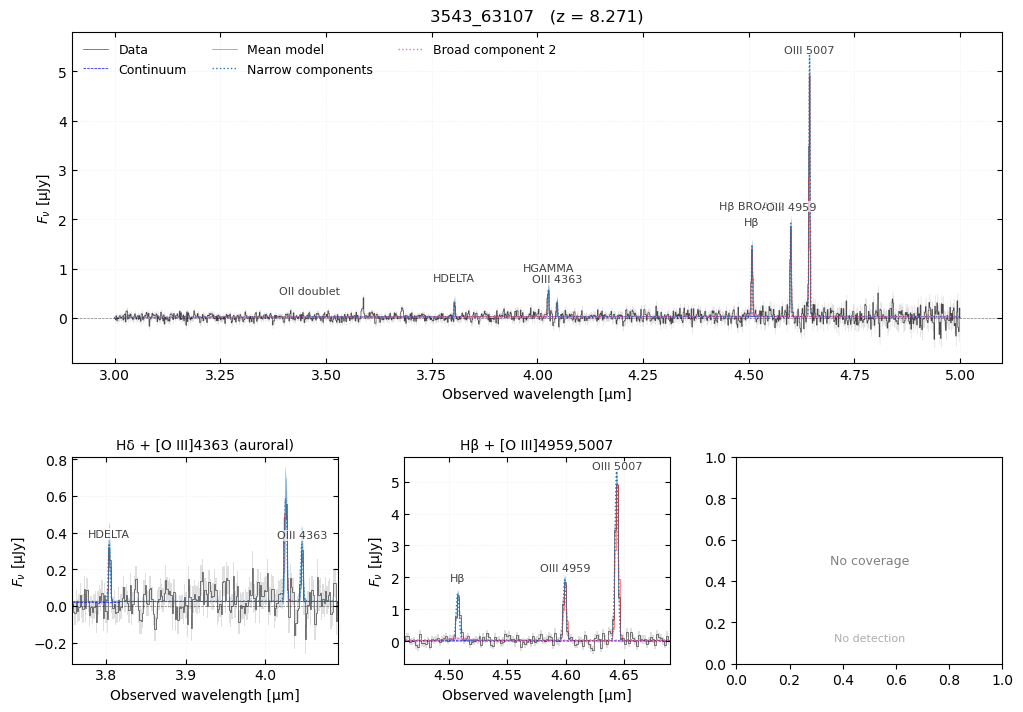


=== MODEL SELECTION (BIC Scores) ===

H-beta:
  Narrow only                      : BIC = 386.99
  Narrow + medium broad            : BIC = 282.87
  Narrow + medium + very broad     : BIC = 291.98
  Narrow + very broad only         : BIC = 272.92
  → Selected: Hβ: narrow + very broad

H-delta:
  Narrow only                      : BIC = 390.61
  → Selected: Hδ: narrow only


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-----------------------------------------------------------------------------------------------------------------------------
OII_doublet      7.163e-20 ± 4.606e-20     9.64 ± 15.75  23.18 ± 12.23   34590.0 ± 33.7 1.02 ± 0.56      1.37 ± 0.47        0.53 ± 0.80
HDELTA          1.907e-19 ± 4.053e-20    38.95 ± 10.61    9.70 ± 1.48    38040.2 ± 6.5 3.78 ± 0.71      3.09 ± 0.63        3.86 ± 0.85
HGAMMA          3.882e-19 ± 6.444e-20    81.24 ± 2

In [1]:
from astropy.io import fits
import numpy as np
# NOTE: keep the same import path you used before
from PyRSR.broad_line_fit import broad_fit, print_bootstrap_line_table_broad

# ---------- Load + crop ----------
specfile = "../../data/excels-uds04-v4_g395m-f290lp_3543_63107.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 3.0) & (lam <= 5.0)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 8.271

boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=100,
    lyman_cut=None,
    deg=2,
    plot_continuum_subtracted = False,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,  
    save_path=None,
    lines_to_use=None,
    broad_mode="auto",
    verbose=False

)

print_bootstrap_line_table_broad(boot)


## cythonised verions - quicker!

Bootstrap (valid draws):   0%|          | 0/100 [00:00<?, ?draw/s]

/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/PyRSRX/broad_line_fit.py:3573: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


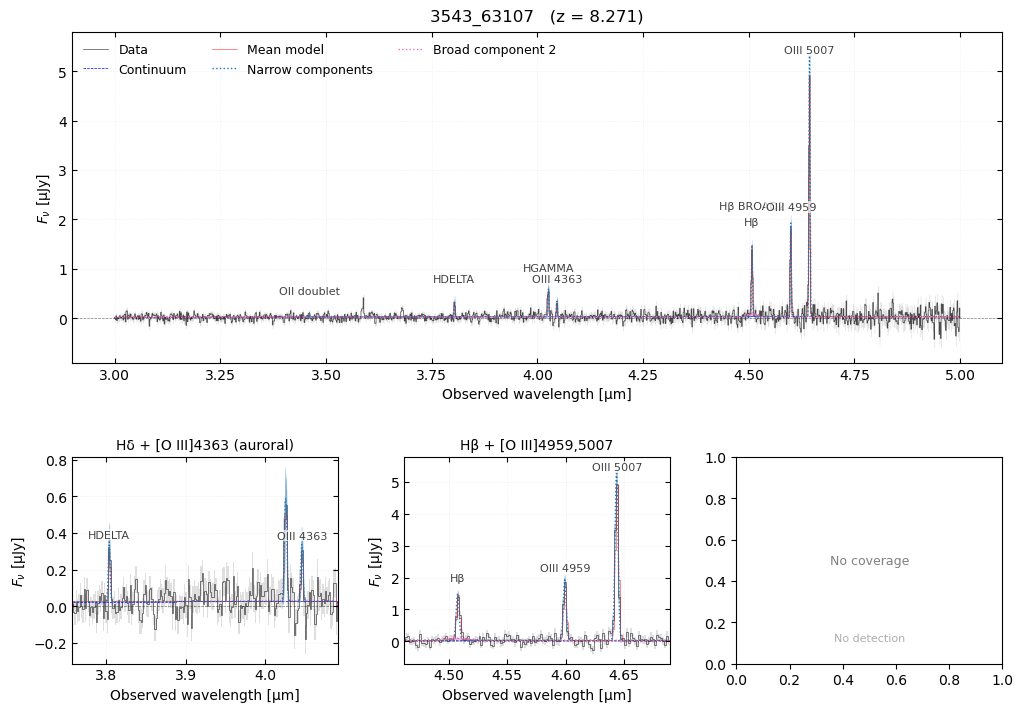


=== MODEL SELECTION (BIC Scores) ===

H-beta:
  Narrow only                      : BIC = 386.99
  Narrow + medium broad            : BIC = 272.83
  Narrow + medium + very broad     : BIC = 291.99
  Narrow + very broad only         : BIC = 272.49
  → Selected: Hβ: narrow + very broad

H-delta:
  Narrow only                      : BIC = 390.61
  → Selected: Hδ: narrow only


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-----------------------------------------------------------------------------------------------------------------------------
OII_doublet      7.254e-20 ± 4.616e-20     9.43 ± 16.35  23.76 ± 12.24   34592.9 ± 35.8 0.98 ± 0.59      1.38 ± 0.45        0.49 ± 0.79
HDELTA          1.909e-19 ± 3.830e-20    38.74 ± 10.76    9.66 ± 1.61    38040.0 ± 6.0 3.78 ± 0.71      3.10 ± 0.61        3.90 ± 0.89
HGAMMA          3.904e-19 ± 6.753e-20    81.78 ± 2

In [1]:
from astropy.io import fits
import numpy as np
# NOTE: keep the same import path you used before
from PyRSRX.broad_line_fit import broad_fit, print_bootstrap_line_table_broad

# ---------- Load + crop ----------
specfile = "../../data/excels-uds04-v4_g395m-f290lp_3543_63107.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 3.0) & (lam <= 5.0)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 8.271

boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=100,
    lyman_cut=None,
    deg=2,
    plot_continuum_subtracted = False,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,  
    save_path=None,
    lines_to_use=None,
    broad_mode="auto",
    verbose=False

)

print_bootstrap_line_table_broad(boot)


  [Weighting] Increasing weight for NII_6549 (factor 9) on 5 pixels.
  [Weighting] Increasing weight for NII_6585 (factor 9) on 5 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585']: χ²=2007.84, k=6, BIC=2037.45
  [Weighting] Increasing weight for NII_6549 (factor 9) on 5 pixels.
  [Weighting] Increasing weight for NII_6585 (factor 9) on 5 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD']: χ²=263.64, k=9, BIC=308.05
  [Weighting] Increasing weight for NII_6549 (factor 9) on 5 pixels.
  [Weighting] Increasing weight for NII_6585 (factor 9) on 5 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD', 'H⍺_BROAD2']: χ²=7091.01, k=12, BIC=7150.22
  -> 2-broad Hα rejected (negative H⍺_BROAD: -4.17e-17)
  [Weighting] Increasing weig

Bootstrap (valid draws):   0%|          | 0/200 [00:00<?, ?draw/s]


FLUX DIAGNOSTIC: Hα Region

Component fluxes in Hα region (4.5485 - 4.7868 µm):
  NII_6549       : 3.174e-19 erg/s/cm²
  H⍺             : 3.183e-17 erg/s/cm²
  NII_6585       : 9.395e-19 erg/s/cm²
  H⍺_BROAD       : 1.724e-17 erg/s/cm²

Total (sum of components)     : 5.033e-17 erg/s/cm²
Total (integrated model)      : 5.060e-17 erg/s/cm²
Ratio (components/model)      : 0.9946
Discrepancy                   : -0.54%



/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/PyRSR/broad_line_fit.py:3602: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


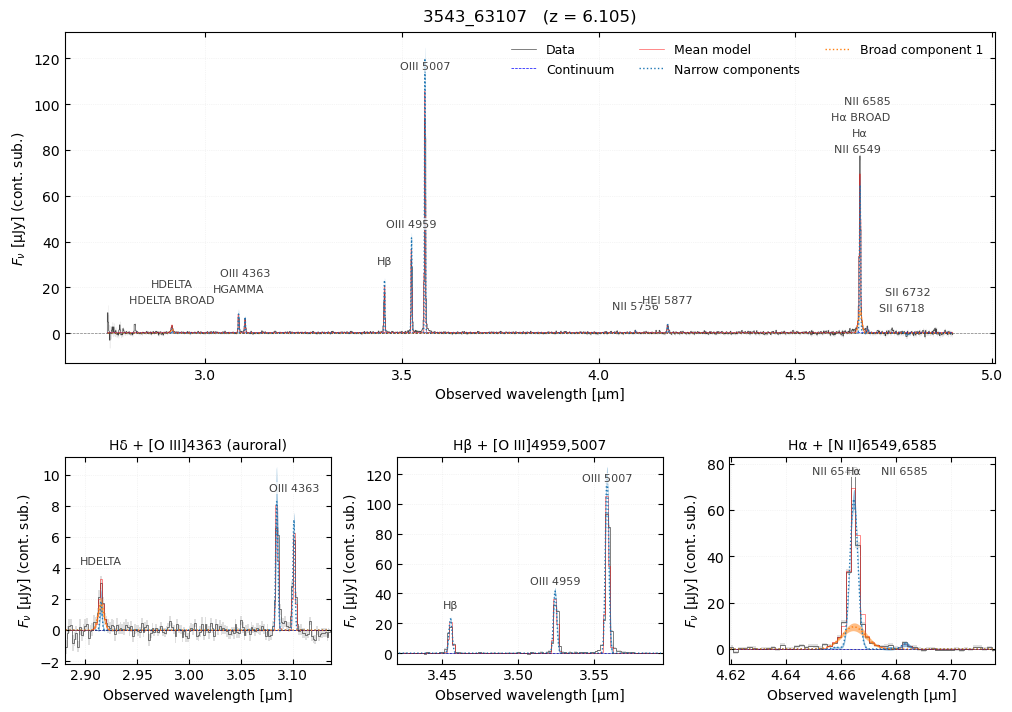


=== MODEL SELECTION (BIC Scores) ===

H-alpha:
  Narrow only                      : BIC = 2037.45
  Narrow + medium broad            : BIC = 308.05
  Narrow + very broad only         : BIC = 788.98
  → Selected: Hα: narrow + medium broad

H-beta:
  Narrow only                      : BIC = 545.36
  Narrow + medium broad            : BIC = 3434.05
  Narrow + medium + very broad     : BIC = 3450.65
  Narrow + very broad only         : BIC = 573.41
  → Selected: Hβ: narrow only

H-delta:
  Narrow only                      : BIC = 677.81
  Narrow + medium broad            : BIC = 637.79
  Narrow + very broad only         : BIC = 669.74
  → Selected: Hδ: narrow + medium broad


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-----------------------------------------------------------------------------------------------------------------------------
HDELTA          

In [2]:
from astropy.io import fits
import numpy as np
from PyRSR.broad_line_fit import broad_fit, print_bootstrap_line_table_broad



# ---------- Load + crop ----------
specfile = "../../data/stark-rxcj2248-v4_g395m-f290lp_2478_3.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 2.75) & (lam <= 5)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 6.1052


boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=200,
    lyman_cut=None,
    deg=2,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,   
    save_path=None,
    lines_to_use=None,
    plot_continuum_subtracted = True,
    broad_mode="auto",
    verbose=True,
    plot_unit='fnu',
)

print_bootstrap_line_table_broad(boot)

# cythonised: quicker!

  [Weighting] Increasing weight for NII_6549 (factor 9) on 5 pixels.
  [Weighting] Increasing weight for NII_6585 (factor 9) on 5 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585']: χ²=2007.84, k=6, BIC=2037.45
  [Weighting] Increasing weight for NII_6549 (factor 9) on 5 pixels.
  [Weighting] Increasing weight for NII_6585 (factor 9) on 5 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD']: χ²=263.64, k=9, BIC=308.05
  [Weighting] Increasing weight for NII_6549 (factor 9) on 5 pixels.
  [Weighting] Increasing weight for NII_6585 (factor 9) on 5 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD', 'H⍺_BROAD2']: χ²=7091.01, k=12, BIC=7150.22
  -> 2-broad Hα rejected (negative H⍺_BROAD: -4.17e-17)
  [Weighting] Increasing weig

Bootstrap (valid draws):   0%|          | 0/200 [00:00<?, ?draw/s]


FLUX DIAGNOSTIC: Hα Region

Component fluxes in Hα region (4.5485 - 4.7868 µm):
  NII_6549       : 4.544e-19 erg/s/cm²
  H⍺             : 3.219e-17 erg/s/cm²
  NII_6585       : 1.345e-18 erg/s/cm²
  H⍺_BROAD       : 1.415e-17 erg/s/cm²

Total (sum of components)     : 4.814e-17 erg/s/cm²
Total (integrated model)      : 4.786e-17 erg/s/cm²
Ratio (components/model)      : 1.0059
Discrepancy                   : +0.59%



/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/PyRSRX/broad_line_fit.py:3617: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


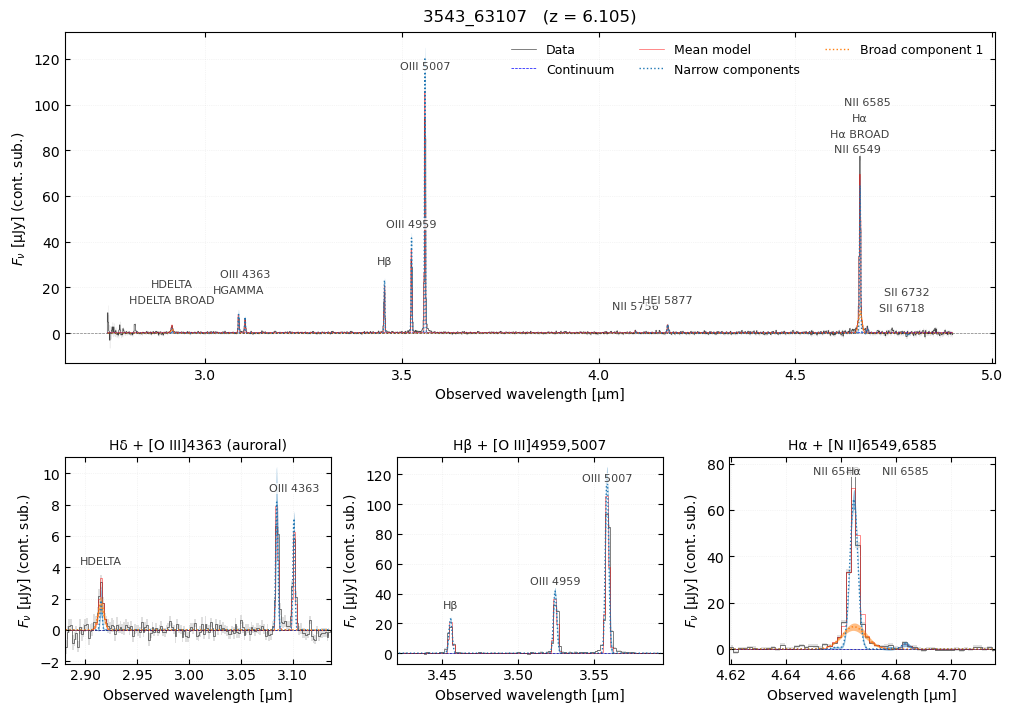


=== MODEL SELECTION (BIC Scores) ===

H-alpha:
  Narrow only                      : BIC = 2037.45
  Narrow + medium broad            : BIC = 308.05
  Narrow + very broad only         : BIC = 788.98
  → Selected: Hα: narrow + medium broad

H-beta:
  Narrow only                      : BIC = 545.36
  Narrow + medium broad            : BIC = 3434.05
  Narrow + medium + very broad     : BIC = 3450.66
  Narrow + very broad only         : BIC = 573.35
  → Selected: Hβ: narrow only

H-delta:
  Narrow only                      : BIC = 677.81
  Narrow + medium broad            : BIC = 637.79
  Narrow + very broad only         : BIC = 669.74
  → Selected: Hδ: narrow + medium broad


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-----------------------------------------------------------------------------------------------------------------------------
HDELTA          

In [1]:
from astropy.io import fits
import numpy as np
from PyRSRX.broad_line_fit import broad_fit, print_bootstrap_line_table_broad



# ---------- Load + crop ----------
specfile = "../../data/stark-rxcj2248-v4_g395m-f290lp_2478_3.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 2.75) & (lam <= 5)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 6.1052


boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=200,
    lyman_cut=None,
    deg=2,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,   
    save_path=None,
    lines_to_use=None,
    fit_window_um=None,
    plot_continuum_subtracted = True,
    broad_mode="auto",
    verbose=True,
    plot_unit='fnu',
)

print_bootstrap_line_table_broad(boot)

# new - under development


=== BIC Model Selection for H⍺ ===
Fitting narrow-only model...
  Narrow-only: BIC = 8458.08
Fitting narrow + BROAD model...
  +BROAD: BIC = 8465.92
Fitting narrow + BROAD2 model...
  +BROAD2 only: BIC = 8469.82
Fitting narrow + BROAD + BROAD2 model...
  +both BROAD: BIC = 8483.04
→ Selected model: narrow + BROAD

Final line list: ['OIII_5007', 'H⍺', 'NII_6549', 'NII_6585', 'H⍺_BROAD']
[MCMC] Running emcee with 32 walkers, 2000 steps, ndim=11


100%|██████████| 2000/2000 [00:04<00:00, 450.11it/s]


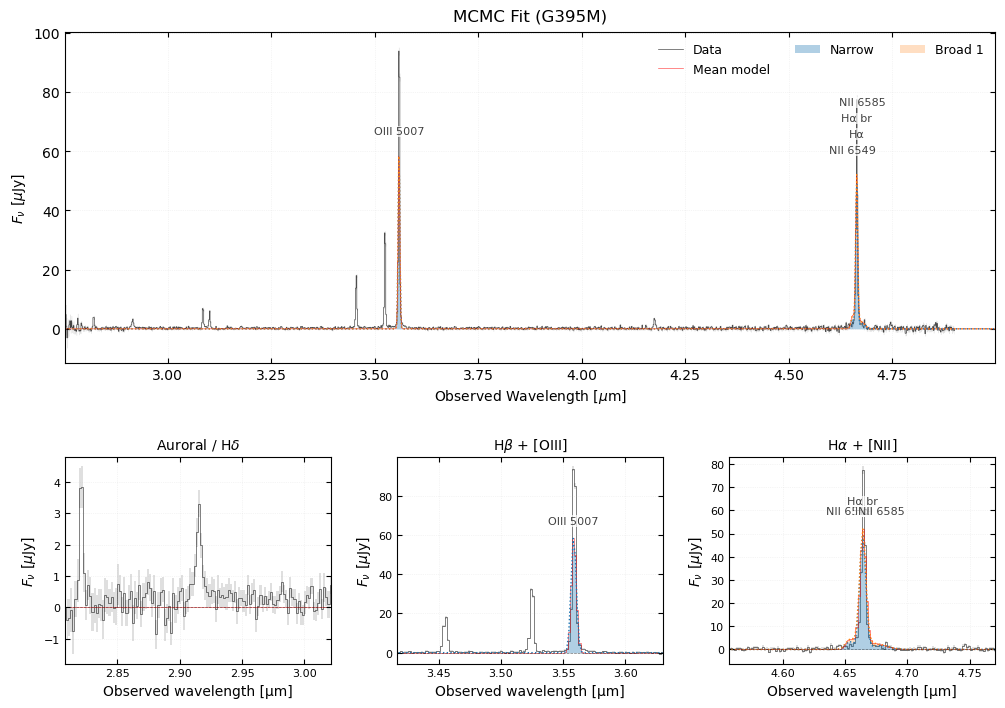


=== MCMC FIT SUMMARY ===
Line            A_gauss              σ_A [Å]              μ_obs [Å]       SNR        FWHM [Å]    
----------------------------------------------------------------------------------------------------
OIII_5007       3.121e+03 ± 1.227e+03 20.24 ± 13.38        35584.2         2.5        47.7        
H⍺              2.996e+03 ± 1.453e+03 24.10 ± 27.00        46642.4         2.1        56.7        
NII_6549        2.866e+02 ± 7.152e+02 33.72 ± 15.62        46537.6         0.4        79.4        
NII_6585        2.998e+02 ± 1.812e+03 68.87 ± 13.41        46789.2         0.2        162.2       
H⍺_BROAD        5.848e+02 ± 1.090e+03 71.26 ± 7.83         46642.4         0.5        167.8       
----------------------------------------------------------------------------------------------------
z_fit = 6.10512


=== MCMC FIT SUMMARY ===
Line            A_gauss              σ_A [Å]              μ_obs [Å]       SNR        FWHM [Å]    
--------------------------------------

In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from PyRSRMC.mcmc import run_mcmc_fit, print_mcmc_summary


# ---------- Load + crop ----------
specfile = "../../data/stark-rxcj2248-v4_g395m-f290lp_2478_3.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 2.75) & (lam <= 5)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 6.1052

res = run_mcmc_fit(
    spec_data=spec,
    z_init=z,
    line_names=["OIII_5007","H⍺","NII_6549", "NII_6585"], 
    grating="G395M",
    n_steps=2000,
    broad_mode="broad1",
    n_walkers=32,
    verbose=True,
    plot=True
)

result = print_mcmc_summary(res)